# Support Vector Regression (SVR)

## Importing the libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [72]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [73]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [74]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


- Reshaping the y variables list because `StandardScaler` class expects dependent variable list as 2-D array.

In [75]:
y = y.reshape((len(y),1))
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

- Here we have to apply explicit feature scaling which is requirement of this model. Unlike Linear, Multiple and Polynomial Regression , 
- Here we need feature scaling as its required by formula of this algorithm, whereas other regression models' variables' coefficients can compensate with higher or lower values of variables.
- We don't have to apply feature-scaling, if the values are b/w -1 to 1 range or similar... 
- Here dependent variable Y : Salaries' values are not b/w -1 to 1 so we'll preprocess them.

In [76]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [77]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [78]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [79]:
from sklearn.svm import SVR   # SVR means Support Vector Rregressor
regressor = SVR(kernel = 'rbf')     # Radial Basis Kernel
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

- Here we have to give transformed value to predict method.so we'll convert our value to required transformed value by `.transform`.
- Now the regressor will give predicted value preprocessed. so we have to convert that value back to original value.
- Notice that here we have only used `transform` and not `fit_transform`. because we don't want to calculate new mea and variance from sc_X. we just want to use previous data to predict the new one! 

In [80]:
print('method 1 :',sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))))

# """ || Longer method
X_temp = [[6.5]]
X_temp = sc_X.transform(X_temp)

y_pred = regressor.predict(X_temp)
y_pred = sc_y.inverse_transform(y_pred)
print('method 2 :',y_pred)
# """

method 1 : [170370.0204065]
method 2 : [170370.0204065]


## Visualising the SVR results

- Here we have to inverse transform values to plot graph in original scale.

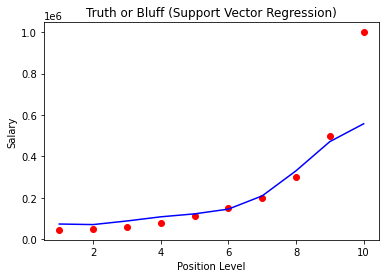

In [81]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

- If there is a point far from other samples, SVR will not consider that point!

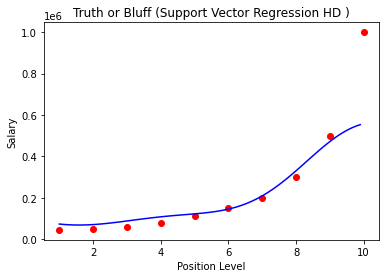

In [82]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.title('Truth or Bluff (Support Vector Regression HD )')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()